# Predicting the progression of diabetes using least-squares regression

The **diabetes** data set is provided as a single file, `diabetes-data.csv`. We obtained it at https://web.stanford.edu/~hastie/Papers/LARS/diabetes.data. For some background information on the data, see this seminal paper:

Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499.

## Set up notebook and load data set

In [2]:
# Standard includes
%matplotlib inline
import numpy as np
import sys
import matplotlib
import matplotlib.pyplot as plt
# Routines for linear regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
# Set label size for plots
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

This next snippet of code loads in the diabetes data. There are 442 data points, each with 10 predictor variables (which we'll denote `x`) and one response variable (which we'll denote `y`).

Make sure the file `'diabetes-data.csv'` is in the same directory as this notebook.

In [63]:
# scaling
from sklearn.preprocessing import StandardScaler, OneHotEncoder

data = np.genfromtxt('diabetes-data.csv', delimiter=',')

features = ['age', 'sex', 'body mass index', 'blood pressure', 
            'serum1', 'serum2', 'serum3', 'serum4', 'serum5', 'serum6']


x = data[:,0:10] # predictors
y = data[:,10] # response variable

# scaling (but don't scale SEX)
x[:, 0:1] = StandardScaler().fit(x[:, 0:1]).transform(x[:, 0:1])
x[:, 2:10] = StandardScaler().fit(x[:, 2:10]).transform(x[:, 2:10])
# y = StandardScaler().fit([y]).transform([y])

# sex_ = data[:, 1]
# enc = OneHotEncoder(categories=sex_).fit([sex_])
# sex_ = enc.transform([sex_]).toarray()
# 
# print(sex_)
# print(sex_.shape)
# 
# for i in range(sex_.shape[1]):
#     data[i, 1] = sex_[0, i]


print("shape of data", np.shape(x))
print("shape of x", np.shape(x))
print("shape of y", np.shape(y))

shape of data (442, 10)
shape of x (442, 10)
shape of y (442,)


## Predict `y` without using `x`

If we want to predict `y` without knowledge of `x`, what value would be predict? The <font color="magenta">mean</font> value of `y`.

In this case, the mean squared error (MSE) associated with the prediction is simply the variance of `y`.

In [64]:
print ("Prediction: ", np.mean(y))
print ("Mean squared error: ", np.var(y))

Prediction:  152.13348416289594
Mean squared error:  5929.884896910383


## Predict `y` using a single feature of `x`

To fit a linear regression model, we could directly use the formula we saw in lecture. To make things even easier, this is already implemented in `sklearn.linear_model.LinearRegression()`.

Here we define a function, **one_feature_regression**, that takes `x` and `y`, along with the index `f` of a single feature and fits a linear regressor to `(x[f],y)`. It then plots the data along with the resulting line.

In [65]:
def one_feature_regression(x,y,f):
    if (f < 0) or (f > 9):
        print ("Feature index is out of bounds")
        return
    regr = linear_model.LinearRegression()
    x1 = x[:,[f]]
    regr.fit(x1, y)
    # Make predictions using the model
    y_pred = regr.predict(x1)
    # Plot data points as well as predictions
    plt.plot(x1, y, 'bo')
    plt.plot(x1, y_pred, 'r-', linewidth=3)
    plt.xlabel(features[f], fontsize=14)
    plt.ylabel('Progression of disease', fontsize=14)
    plt.show()
    print ("Mean squared error: ", mean_squared_error(y, y_pred))
    return regr

Let's try this with feature #2 (body mass index).

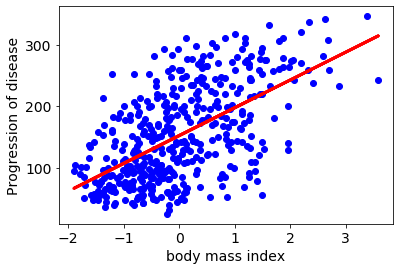

Mean squared error:  3890.456585461273
w =  [45.16003002]
b =  152.13348416289617


In [66]:
regr = one_feature_regression(x,y,2)
print ("w = ", regr.coef_)
print ("b = ", regr.intercept_)

<font color="magenta">For you to try:</font> Feature #2 ('body mass index') is the single feature that yields the lowest mean squared error. Which feature is the second best? 

In [67]:
### You can use this space to figure out the second-best feature
def feature_MSE(x,y,f):
    if (f < 0) or (f > 9):
        print ("Feature index is out of bounds")
        return
    regr = linear_model.LinearRegression()
    x1 = x[:,[f]]
    regr.fit(x1, y)
    # Make predictions using the model
    y_pred = regr.predict(x1)
    return  mean_squared_error(y, y_pred)


for i in [x for x in range(0,10) ]:
    print( "feature#" +str(i)+ ", MSE = " + str(feature_MSE(x,y,i)))

featuresM= list(features)
# del featuresM[2]
MSEs = [feature_MSE(x,y,f) for f in [x for x in range(0,10) if x!=2]]
print("\nsecond best feature is " + featuresM[np.argmin(MSEs)])

feature#0, MSE = 5720.5470172056475
feature#1, MSE = 5918.888899586022
feature#2, MSE = 3890.456585461273
feature#3, MSE = 4774.113902368687
feature#4, MSE = 5663.315623739354
feature#5, MSE = 5750.241102677782
feature#6, MSE = 5005.661620710652
feature#7, MSE = 4831.13838643409
feature#8, MSE = 4030.998722591287
feature#9, MSE = 5062.380594520542

second best feature is serum4


## Predict `y` using a specified subset of features from `x`

The function **feature_subset_regression** is just like **one_feature_regression**, but this time uses a list of features `flist`.

In [68]:
def feature_subset_regression(x,y,flist):
    if len(flist) < 1:
        print ("Need at least one feature")
        return
    for f in flist:
        if (f < 0) or (f > 9):
            print ("Feature index is out of bounds")
            return
    regr = linear_model.LinearRegression()
    regr.fit(x[:,flist], y)
    return regr

Try using just features #2 (body mass index) and #8 (serum5).

In [69]:
flist = [2,8]
regr = feature_subset_regression(x,y,[2,8])
print ("w = ", regr.coef_)
print ("b = ", regr.intercept_)
print ("Mean squared error: ", mean_squared_error(y, regr.predict(x[:,flist])))

w =  [32.10986972 29.25018278]
b =  152.13348416289602
Mean squared error:  3205.1900768248533


Finally, use all 10 features.

In [70]:
regr = feature_subset_regression(x,y,range(0,10))
print ("w = ", regr.coef_)
print ("b = ", regr.intercept_)
print ("Mean squared error: ", mean_squared_error(y, regr.predict(x)))

w =  [ -0.47612079 -22.85964809  24.72654886  15.42940413 -37.67995261
  22.67616277   4.80613814   8.42203936  35.73444577   3.21667372]
b =  185.69889504690832
Mean squared error:  2859.6963475867497


## Splitting the data into a training and test set

We define a procedure **split_data** that partitions the data set into separate training and test sets. It is invoked as follows:

* `trainx, trainy, testx, testy = split_data(n_train)`

Here:
* `n_train` is the desired number of training points
* `trainx` and `trainy` are the training points and response values
* `testx` and `testy` are the test points and response values

The split is done randomly, but the random seed is fixed, and thus the same split is produced if the procedure is called repeatedly with the same `n_train` parameter.
**Note:** You can also use python built-in libraries for splitting data like:
`from sklearn.model_selection import train_test_split`

In [71]:
def split_data(n_train):
    if (n_train < 0) or (n_train > 442):
        print ("Invalid number of training points")
        return
    np.random.seed(0)
    perm = np.random.permutation(442)
    training_indices = perm[range(0,n_train)]
    test_indices = perm[range(n_train,442)]
    trainx = x[training_indices,:]
    trainy = y[training_indices]
    testx = x[test_indices,:]
    testy = y[test_indices]
    return trainx, trainy, testx, testy

## 1. Implementing the closed-form solution

To fit a linear regression model, we can directly use the closed-form formula we saw in lecture. Implement a method to get the parameters of the linear regression using the closed-form solution. The method should take features `x` and predictions `y` of the training set and return back the parameter values including the bias term.

In [72]:
trainx, trainy, testx, testy = split_data(100)

def linear_regression_CF(trainx, trainy):
    # inputs: trainx and trainy, the features and the target in the training set
    # output: a vector of weights including the bias term
    
     ### START CODE HERE ###
        
    # cearting the ones array to be appended to our feature array as the bias
    ones = np.ones(shape=trainy.shape) [..., None]
   
    # concatenating the ones to the feature array
    trainx = np.concatenate((ones, trainx), 1)
    
    # W = (X^T . X)^-1 (X^T Y)
    return np.linalg.inv(trainx.transpose().dot(trainx)).dot(trainx.transpose().dot(trainy))
    ### END CODE HERE ###
    
print(linear_regression_CF(trainx, trainy))


[ 187.48956092    5.11969977  -28.66050411   17.87693353   16.90267534
 -145.9469604   124.89089322   43.7741804     5.85570198   64.30460213
    8.11845642]


## 2. Implementing the iterative solution

In this section, you you are required to implement the iterative (gradient descent) solution. The method should take features `x` and predictions `y` of the training set and return back the parameter values including the bias term. You should also initialize the hyper-parameters in the beginning of the method. Also, plot the the cost function at different iterations.
Here, the input consists of:
* training data `trainx, trainy`, where `trainx` and `trainy` are numpy arrays of dimension `m`-by-`n` and `m`, respectively (if there are `m` training points and `n` features)

The function should find the `n`-dimensional vector `w` and offset `b` that minimize the MSE loss function, and return:
* `w` and `b`
* `losses`, an array containing the MSE loss at each iteration

<font color="magenta">Advice:</font> First figure out the derivative, which has a relatively simple form. Next, when implementing gradient descent, think carefully about two issues.

1. What is the step size (learning rate)?
2. When has the procedure converged?

Take the time to experiment with different ways of handling these.

**Note:** You can use additional methods as helpers if you feel the need.

**Note:** MSE is the RSS value divided by the number of samples to get the mean.

final loss=12467.56130
Bias:
4.490848053669997
weights:
[1.94900454 1.72652921 3.79243408 3.09301973 3.98584057 5.52701148
 5.11591454 5.59870204 4.54476059 6.72515129]
costs:
[14578.135046436631, 14577.865520641737, 14577.5960086098, 14577.326510340126, 14577.057025832, 14576.787555084731, 14576.518098097613, 14576.24865486994, 14575.979225401008, 14575.709809690117, 14575.440407736569, 14575.17101953966, 14574.90164509868, 14574.632284412935, 14574.362937481717, 14574.093604304328, 14573.824284880064, 14573.554979208217, 14573.285687288097, 14573.01640911899, 14572.7471447002, 14572.477894031026, 14572.208657110761, 14571.939433938705, 14571.670224514157, 14571.401028836412, 14571.131846904773, 14570.862678718537, 14570.593524277, 14570.324383579458, 14570.055256625212, 14569.786143413561, 14569.517043943802, 14569.247958215237, 14568.978886227158, 14568.709827978864, 14568.440783469661, 14568.171752698841, 14567.9027356657, 14567.633732369542, 14567.364742809666, 14567.095766985363,

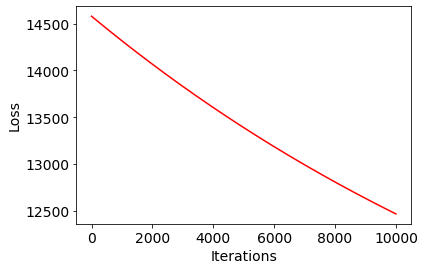

In [73]:
# m: the number of samples

def concat_bias_column_as_feature(X):
    """@param X - the training featuers m by n, appends a bias column as 1's to the beginning"""
    return np.hstack((np.ones(X.shape[0])[np.newaxis].T, X)) # adding a column of 1's (this is for the bias)

def predict(X, W):
    return np.dot(X, W)

def loss(X, Y, W, C=0, ridge=False):
    """
    @param c - the regularization constant
    @param ridge - if True, will compute "Ridge" regularization
    """
    m = X.shape[1]
    Y_hat = predict(X, W)
    reg_term = np.linalg.norm(W) ** 2 if ridge else np.linalg.norm(W)

    return 1.0/2.0 * np.mean((Y - Y_hat) ** 2) + C * reg_term / m


def loss_derivative(X, Y, W, C=0, ridge=False):
    m = X.shape[1]
    reg_term = 2 * np.linalg.norm(W) if ridge else 1
    
    return -1.0 / m * (np.sum(np.dot(Y - predict(X, W), X)) + C * reg_term)


def regression_GD_general(x, y, C=0, ridge=False, n_epochs=1e4, lr=0.001, epsilon=1e-14, random_state=None):
    """
    :param x: training data points
    :param y: training labels
    :param C: regularization constant
    :param ridge: boolean, True if ridge regularization, else Lasso
    :param n_epochs: 
    :param lr: learning rate
    :param epsilon: stop when delta_loss < epsilon
    :param random_state: random seed for weight initialization
    :return: w, b, training_losses
    """
    # adding the bias in the beginning of the X (to make things simpler)
    X = concat_bias_column_as_feature(x)
    
    np.random.seed(random_state) # setting random seed for weight initialization
    # creating a weights vector that contains the bias as well
    W = np.random.randn(X.shape[1])
    Y = y
    m = X.shape[1]
    
#     print("X:", X.shape)
#     print("Y:", Y.shape)
#     print("W:", W.shape)

    last_loss = np.Inf
    training_losses = []
    for e in range(int(n_epochs)):
        delta_W = loss_derivative(X, y, W, C=C, ridge=ridge)
#         print('delta_W',delta_W.shape)
        err = loss(X, y, W, C=C, ridge=ridge)
        
        W = W - lr * ( delta_W)  # updating weights

        # print("{}: Loss={}".format(e, err))
        # the bellow is just logging/printing stuff
        training_losses.append(err)
        if np.abs(err - last_loss) < epsilon:
            print(f'STOPPING EARLY at epoch {e} (epsilon={epsilon})')
            break
        else:
            last_loss = err

    w, b = W[1:], W[0] # splitting the joint weights:bias, into 2 variables
    
    print('final loss={:.5f}'.format(training_losses[-1]))
    return w, b, training_losses


c=0
w, b, losses = regression_GD_general(trainx, trainy,c, lr=0.0000001)

print("Bias:")
print(b)
print("weights:")
print( w )
print("costs:")
print(losses)

plt.plot(losses,'r')
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.show()


trainy shape 
(100,)
trainx shape 
(100, 11)
W shape 
(1, 11)
Bias: 43.49794528099318
weights: [ 1.58905489 55.39280321 12.32340072 10.95849957  3.27645709  3.51729904
 -1.57349957  0.72397672  7.18301425  6.30634195]
costs: [13997.27       13997.20009533 13997.13019113 ...  3864.90105261
  3864.9000526   3864.89905261]


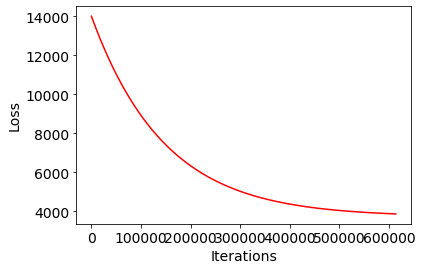

In [74]:
# def calc_cost(trainx, trainy, W):
#     squares = np.power((  trainy - (trainx @ W.T)  ), 2)
#     return np.sum(squares) / (len(trainy) * 2)

def linear_regression_GD_vectorized(trainx, trainy):
    # inputs: trainx and trainy, the features and the target in the training set
    # output: a vector of weights including the bias term
    
    ### START CODE HERE ###
    
    #initialize learning rate
    LR = 0.000001
    print( "trainy shape ")
    print(trainy.shape)
   
    
    # concatenate ones for the bias term
    ones = np.ones([trainy.shape[0], 1])
    trainx= np.concatenate((ones, trainx), axis=1)
    print( "trainx shape ")
    print(trainx.shape)
    
    # initializing weights + bias to zeros
    W = np.zeros([1, trainx.shape[1]])
    print( "W shape ")
    print(W.shape)
    
    costs = []
    # append initial cost
    costs.append(loss(trainx, trainy, W.reshape(11,1)))
    
    for i in range(sys.maxsize):
               
        # update the weights
        W = W - (LR/len(trainx)) * np.sum(trainx * ((trainx @ W.T) - trainy.reshape(len(trainy),1)), axis=0)
        
        # calculate the new cost and append it to costs
        newCost = loss(trainx, trainy, W.reshape(11,1))
        costs.append(newCost)
        
#         print(newCost - costs[i])        
#         print("old cost: "+ str(costs[i]))
#         print("new cost: "+str(newCost))

        # check the difference between the old and the new cost, if less than 0.01 break out
        if abs(newCost - costs[i]) < 0.001:
            break
            
 
    # split into bias and weights
    w, b = W[0][1:], W[0][0] 
    
    return b, w, np.array(costs)
    ### END CODE HERE ###


B, W, costs = linear_regression_GD_vectorized(trainx, trainy)
print("Bias:", B)
print("weights:", W )
print("costs:", costs)

plt.plot(costs,'r')
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.show()


trainy shape 
(100,)
trainx shape 
(100, 11)
W shape 
(1, 11)
Bias:
43.49794528099318
weights:
[ 1.58905489 55.39280321 12.32340072 10.95849957  3.27645709  3.51729904
 -1.57349957  0.72397672  7.18301425  6.30634195]
costs:
[13997.27       13997.20009533 13997.13019113 ...  3864.90105261
  3864.9000526   3864.89905261]


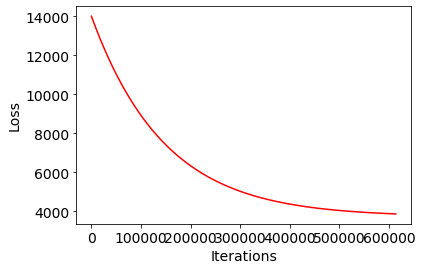

In [75]:
def linear_regression_GD_iterative(trainx, trainy):
    # inputs: trainx and trainy, the features and the target in the training set
    # output: a vector of weights including the bias term
    
    ### START CODE HERE ###
    
    #initialize learning rate
    LR = 0.000001
    print( "trainy shape ")
    print(trainy.shape)
   
    
    # concatenate ones for the bias term
    ones = np.ones([trainy.shape[0], 1])
    trainx= np.concatenate((ones, trainx), axis=1);
    print( "trainx shape ")
    print(trainx.shape)
    
    # initializing weights + bias to zeros
    W = np.zeros([1, trainx.shape[1]])
    print( "W shape ")
    print(W.shape)
    
    costs = []
    # append initial cost
    costs.append(loss(trainx, trainy, W.reshape(11,1)))
    
    for i in range(sys.maxsize):
        
        # features*weights = y_predictions =  XW (including bias)
        y_predicted = trainx.dot(W.transpose())
#         y_predicted = y_predicted[0]
#         print("y_predicted")
#         print(y_predicted.shape)

        
        # y_predicted - y_actual
        differences = []
        for x in range(len(trainy)):
            differences.append(y_predicted[x] - trainy[x])
        
        differences = np.array(differences)
#         print("differences")
#         print(differences.shape)
#         print(differences)
        
        # X ( y_predicted - y_actual)
        derivatives = []
        for j in range(len(trainy)):
            derivatives.append(trainx[j] * differences[j] )
        
        derivatives = np.array(derivatives)
#         print("derivatives")
#         print(derivatives.shape)
        
        
        derivative_sum = np.sum(derivatives, axis=0)
#         print("derivative_sum")
#         print(derivative_sum.shape)
        
#         # update weights:
        W = W - (LR/len(trainy)) * derivative_sum
        
        
        
        # calculate the new cost and append it to costs
        newCost = loss(trainx, trainy, W.reshape(11,1))
        costs.append(newCost)
                
#         print("old cost: "+ str(costs[i]))
#         print("new cost: "+str(newCost))

        # check the difference between the old and the new cost, if less than 0.01 break out
        if abs(newCost - costs[i]) < 0.001:  
            break
        
    # split into bias and weights
    w, b = W[0][1:], W[0][0] 
    
    return b, w, np.array(costs)
    ### END CODE HERE ###
    
B_iterative, W_iterative, cost_iterative = linear_regression_GD_iterative(trainx, trainy)
print("Bias:")
print(B_iterative)
print("weights:")
print( W_iterative )
print("costs:")
print(cost_iterative)

plt.plot(cost_iterative,'r')
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.show()


## 3. Use diffrent amounts of training data to fit the model

Using the **split_data** procedure to partition the data set, compute the training MSE and test MSE when fitting a regressor to *all* features, for the following training set sizes:
* `n_train = 20`
* `n_train = 50`
* `n_train = 100`
* `n_train = 200`
* `n_train = 300`


1. Compare your results for the three approaches, i.e., using library, using closed-form solution, and using the iterative solution. Provide your comments on the results.
2. Compare the parameter values for the three solutions when using `n_train = 300` training samples.

**Analytical Questions:**

3. What changes you need to do if the unit of `y` is different?
4. What changes you need to do if the unit of one of the features was different? For example if **age** was in months and not in years. 
5. What if both 3 and 4 apply?

In [76]:
#function that coputes mse from w,b,x,y
def compute_mse(w,b,x,y):
    ### START CODE HERE ###
    X = concat_bias_column_as_feature(x) # adding the bias in the beginning of the X (to make things simpler)
    W = np.hstack((b, w))
    m = X.shape[1]
    
    Y_hat = predict(X, W)
    return 1.0/(2.0 * m) * np.sum((y - Y_hat) ** 2)

In [77]:
C=0
#using training set of 20
print("computing the training MSE and test MSE when fitting a regressor to all features with a data set of 20")
trainx, trainy, testx, testy = split_data(20)
regr = feature_subset_regression(trainx,trainy,range(0,10))
CF=linear_regression_CF(trainx, trainy)
CF_w, CF_b = CF[1:], CF[0] # splitting the joint weights:bias, into 2 variables
w, b, losses = regression_GD_general(trainx, trainy, C, n_epochs=100, lr=0.0000001)

#training
print("MSE of built-in linear regression(Training), data(20):", mean_squared_error(trainy, regr.predict(trainx)))
print("MSE of closed-form solution (Training), data(20)     :", compute_mse(CF_w,CF_b,trainx, trainy))
print("MSE of gradient descent solver (Training), data(20)  :", compute_mse(w,b,trainx, trainy))

#testing
print("MSE of built-in linear regression(Testing ), data(20):", mean_squared_error(testy, regr.predict(testx)))
print("MSE of closed-form solution (Training), data(20)     :", compute_mse(CF_w,CF_b,testx, testy))
print("MSE of gradient descent solver (Training), data(20)  :", compute_mse(w,b,testx, testy))

#using training set of 50
print("\ncomputing the training MSE and test MSE when fitting a regressor to all features with a data set of 50")
trainx, trainy, testx, testy = split_data(50)
regr = feature_subset_regression(trainx,trainy,range(0,10))
CF=linear_regression_CF(trainx, trainy)
CF_w, CF_b = CF[1:], CF[0] # splitting the joint weights:bias, into 2 variables
w, b, losses = regression_GD_general(trainx, trainy, C, n_epochs=100, lr=0.0000001)

#training
print("MSE of built-in linear regression(Training), data(50):", mean_squared_error(trainy, regr.predict(trainx)))
print("MSE of closed-form solution (Training), data(50)     :", compute_mse(CF_w,CF_b,trainx, trainy))
print("MSE of gradient descent solver (Training), data(50)  :", compute_mse(w,b,trainx, trainy))

#testing
print("MSE of built-in linear regression(Testing ), data(50):", mean_squared_error(testy, regr.predict(testx)))
print("MSE of closed-form solution (Training), data(50)     :", compute_mse(CF_w,CF_b,testx, testy))
print("MSE of gradient descent solver (Training), data(50)  :", compute_mse(w,b,testx, testy))

#using training set of 100
print("\ncomputing the training MSE and test MSE when fitting a regressor to all features with a data set of 100")
trainx, trainy, testx, testy = split_data(100)
regr = feature_subset_regression(trainx,trainy,range(0,10))
CF=linear_regression_CF(trainx, trainy)
CF_w, CF_b = CF[1:], CF[0] # splitting the joint weights:bias, into 2 variables
w, b, losses = regression_GD_general(trainx, trainy, C, n_epochs=100, lr=0.0000001)

#training
print("MSE of built-in linear regression(Training), data(100):", mean_squared_error(trainy, regr.predict(trainx)))
print("MSE of closed-form solution (Training), data(100)     :", compute_mse(CF_w,CF_b,trainx, trainy))
print("MSE of gradient descent solver (Training), data(100)  :", compute_mse(w,b,trainx, trainy))

#testing
print("MSE of built-in linear regression(Testing ), data(100):", mean_squared_error(testy, regr.predict(testx)))
print("MSE of closed-form solution (Training), data(100)     :", compute_mse(CF_w,CF_b,testx, testy))
print("MSE of gradient descent solver (Training), data(100)  :", compute_mse(w,b,testx, testy))

#using training set of 200
print("\ncomputing the training MSE and test MSE when fitting a regressor to all features with a data set of 200")
trainx, trainy, testx, testy = split_data(200)
regr = feature_subset_regression(trainx,trainy,range(0,10))
CF=linear_regression_CF(trainx, trainy)
CF_w, CF_b = CF[1:], CF[0] # splitting the joint weights:bias, into 2 variables
w, b, losses = regression_GD_general(trainx, trainy, C, n_epochs=100, lr=0.0000001)

#training
print("MSE of built-in linear regression(Training), data(200):", mean_squared_error(trainy, regr.predict(trainx)))
print("MSE of closed-form solution (Training), data(200)     :", compute_mse(CF_w,CF_b,trainx, trainy))
print("MSE of gradient descent solver (Training), data(200)  :", compute_mse(w,b,trainx, trainy))

#testing
print("MSE of built-in linear regression(Testing ), data(200):", mean_squared_error(testy, regr.predict(testx)))
print("MSE of closed-form solution (Training), data(200)     :", compute_mse(CF_w,CF_b,testx, testy))
print("MSE of gradient descent solver (Training), data(200)  :", compute_mse(w,b,testx, testy))

#using training set of 300
print("\ncomputing the training MSE and test MSE when fitting a regressor to all features with a data set of 300")
trainx, trainy, testx, testy = split_data(300)
regr = feature_subset_regression(trainx,trainy,range(0,10))
CF=linear_regression_CF(trainx, trainy)
CF_w, CF_b = CF[1:], CF[0] # splitting the joint weights:bias, into 2 variables
w, b, losses = regression_GD_general(trainx, trainy, C, n_epochs=100, lr=0.0000001)

#training
print("MSE of built-in linear regression(Training), data(300):", mean_squared_error(trainy, regr.predict(trainx)))
print("MSE of closed-form solution (Training), data(300)     :", compute_mse(CF_w,CF_b,trainx, trainy))
print("MSE of gradient descent solver (Training), data(300)  :", compute_mse(w,b,trainx, trainy))

#testing
print("MSE of built-in linear regression(Testing ), data(300):", mean_squared_error(testy, regr.predict(testx)))
print("MSE of closed-form solution (Training), data(300)     :", compute_mse(CF_w,CF_b,testx, testy))
print("MSE of gradient descent solver (Training), data(300)  :", compute_mse(w,b,testx, testy))


computing the training MSE and test MSE when fitting a regressor to all features with a data set of 20
final loss=15905.01145
MSE of built-in linear regression(Training), data(20): 1636.1425922669446
MSE of closed-form solution (Training), data(20)     : 1487.4023566063133
MSE of gradient descent solver (Training), data(20)  : 28918.13991332118
MSE of built-in linear regression(Testing ), data(20): 6764.1872436901385
MSE of closed-form solution (Training), data(20)     : 129749.40985623335
MSE of gradient descent solver (Training), data(20)  : 566143.2789841412

computing the training MSE and test MSE when fitting a regressor to all features with a data set of 50
final loss=15834.23547
MSE of built-in linear regression(Training), data(50): 2414.3515888695883
MSE of closed-form solution (Training), data(50)     : 5487.162701976335
MSE of gradient descent solver (Training), data(50)  : 71973.34506099891
MSE of built-in linear regression(Testing ), data(50): 7991.270972912033
MSE of close